# Interpolacija

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylorjeva vrsta

Naj bo $f(x)$ zvezna, odvedljiva funkcija. V okolici točke $x_0$ lahko takšno funkcijo razvijemo v Taylorjevo vrsto

$$ f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n, $$

kjer je $ f^{(n)}(x)$ n-ti odvod funkcije $f(x)$.

### 1.1. Primer: Exponentna funkcija

Za eksponentno funkcijo velja

$$ f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=e^x, $$

Taylorjev razvoj funkcije je torej

$$ f(x)=e^{x_0}\sum_{n=0}^\infty \frac{1}{n!}(x-x_0)^n $$

In [2]:
def expTaylor(x, x0, nmax):
    ts = 0
    for n in range(nmax+1):
        ts = ts + np.exp(x0) * (x-x0)**n / np.math.factorial(n)
    return ts

Narišimo nekaj primerov

/tmp/ipykernel_1912/3737297369.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ts = ts + np.exp(x0) * (x-x0)**n / np.math.factorial(n)


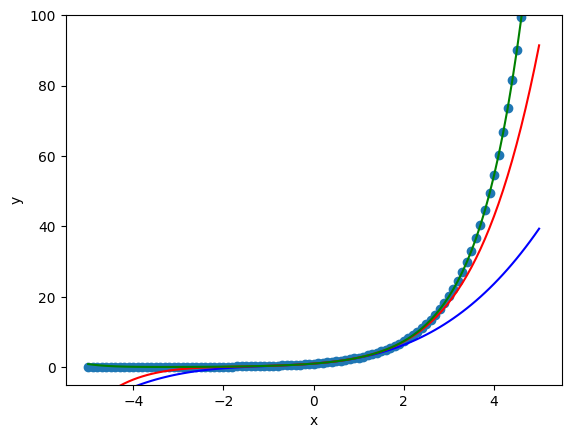

In [3]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,100])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))

plt.plot(x_list, expTaylor(x_list, 0, 3), 'blue')
plt.plot(x_list, expTaylor(x_list, 0, 5), 'red')
plt.plot(x_list, expTaylor(x_list, 0, 10), 'green')

### 1.2. Splošna odvedljiva funkcija

V tej vaji bomo za odvod uporabili nastavek

$$ f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}. $$

Drugi tipi numeričnega odvajanja bodo predmet naslednjih vaj.

In [4]:
def derivative(f, x, h):
    return (f(x+h) - f(x)) / h

Obravnavamo primer funkcije

$$ f(x) = 2\sin^2(x)+x $$

katere odvod lahko izračunamo z verižnim pravilom

$$ f'(x)=4\sin(x)\cos(x)+1. $$

In [5]:
def func(x):
    return 2*np.sin(x)**2 + x

def dfunc(x):
    return 4*np.sin(x)*np.cos(x) + 1

In [6]:
x0 = 10.5
h = 0.1

In [7]:
dfunc(x0)

2.673311277072112

In [8]:
derivative(func, x0, h)

2.5529969724111723

Višje odvode lahko izračunamo z infuktivno aplikacije formule za odvod kot:

$$ f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh) $$

In [9]:
def nDerivative(f, x, h, n):
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
    return t / h**n

In [10]:
nDerivative(func, x0, h, 1)

/tmp/ipykernel_1912/1141264737.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)


2.5529969724111723

Sedaj lahko zapišemo funkcijo za Taylorjev razvoj splošne zvezne odvedljive funkcije $f$.

In [11]:
def taylor(f, x, x0, nmax, h):
    ts = 0
    for n in range(nmax+1):
        ts = ts + nDerivative(f, x0, h, n) * (x-x0)**n / np.math.factorial(n)
    return ts

Primer 1:

/tmp/ipykernel_1912/1141264737.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)


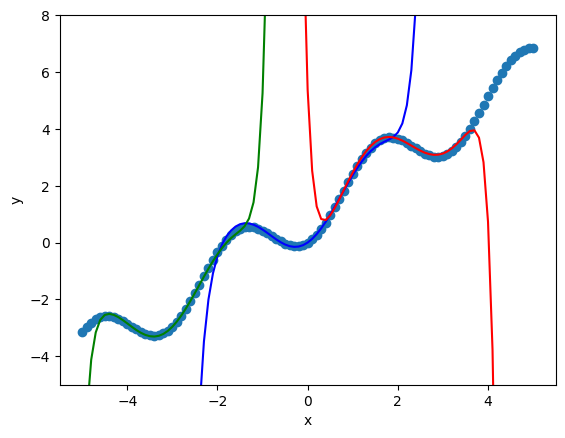

In [12]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,8])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), 'blue')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), 'red')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), 'green')

Primer 2:

/tmp/ipykernel_1912/1141264737.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)


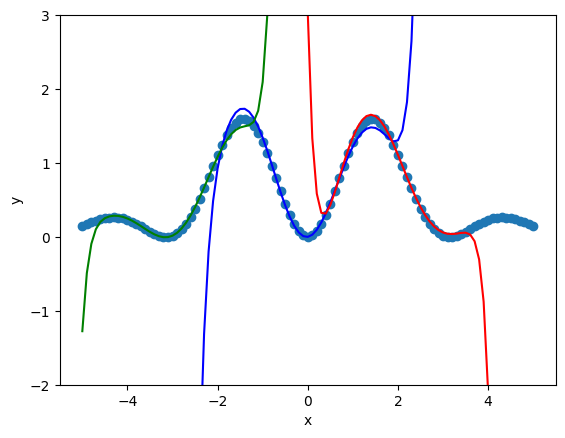

In [13]:
def func(x):
    return 2*np.sin(x)**2 * np.exp(-0.1*x**2)

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,3])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), 'blue')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), 'red')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), 'green')

## 2. Interpolacija

### 2.1. Generiramo testne podatke

In [14]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

In [15]:
npoints = 21
x_list = np.linspace(-5,5,npoints)
data0 = np.array([x_list, correctFunction(x_list)])

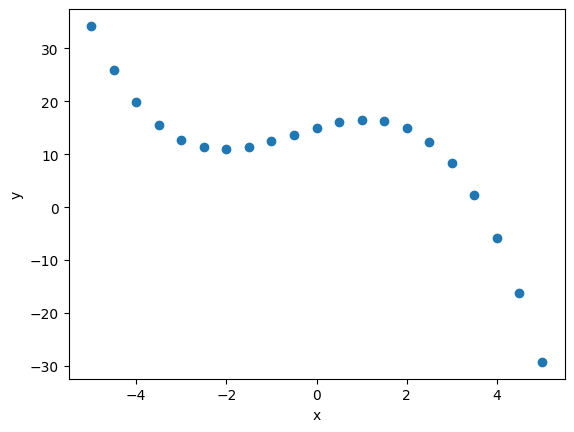

In [16]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

Dodajmo random odmike, da zgeneriramo realistično množico podatkov:

In [17]:
data = np.array([data0[0] + 0.25 * (2*np.random.rand(npoints)-1), data0[1] + 5.0 * (2*np.random.rand(npoints)-1)])

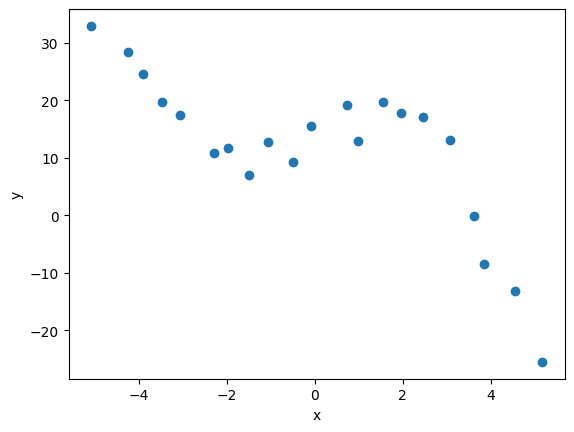

In [18]:
plt.xlabel('x')
plt.ylabel('y')

# plt.plot(data0[0], data0[1], 'black')
plt.scatter(data[0], data[1])

## 2.2 Spline interpolacija

Spline interpolacija vedno popolno opiše podatke in v primeru, da uporabimo spline kubičnega tipa ima tudi zvezen odvod.

Funkcija spline je definirana po odsekih (med točkami)

### 2.2.1 Nespremenjeni podatki

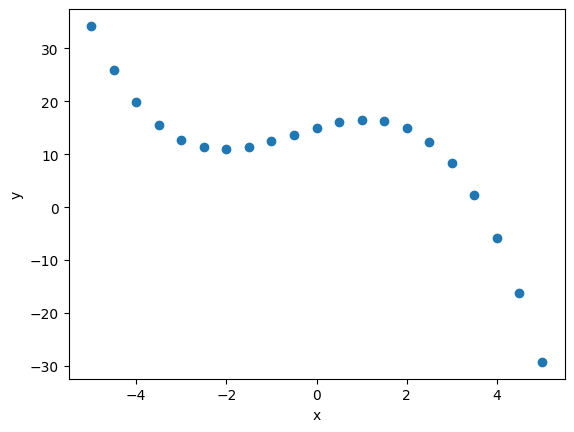

In [19]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

In [20]:
from scipy import interpolate

Linearni spline:

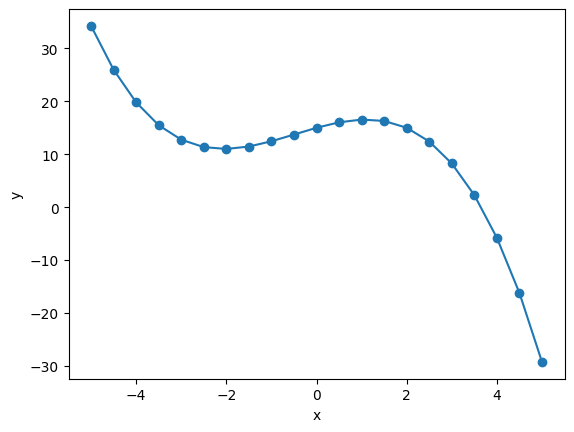

In [21]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind = 'linear')

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

Povečajmo:

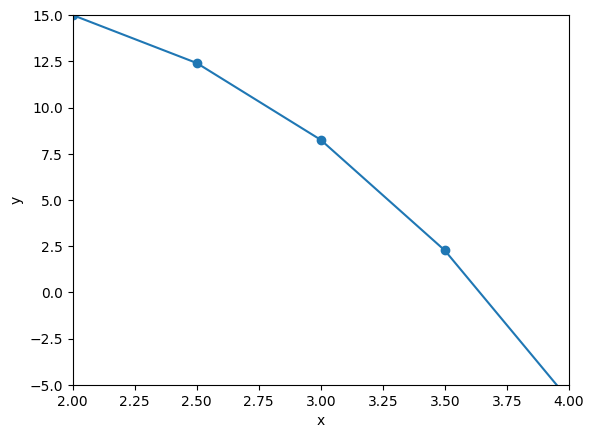

In [22]:
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list))

Kubičen spline:

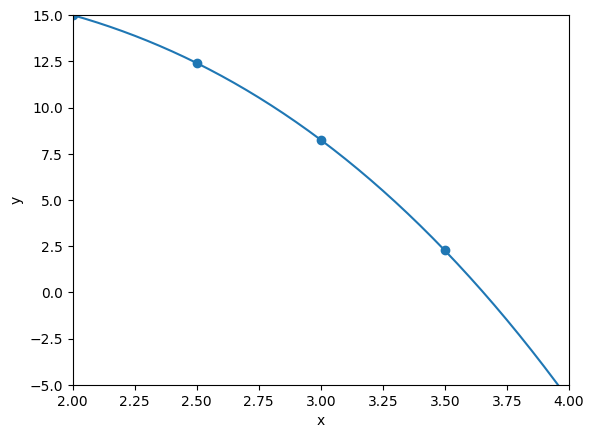

In [23]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list))

### 2.2.2 Modificirani podatki

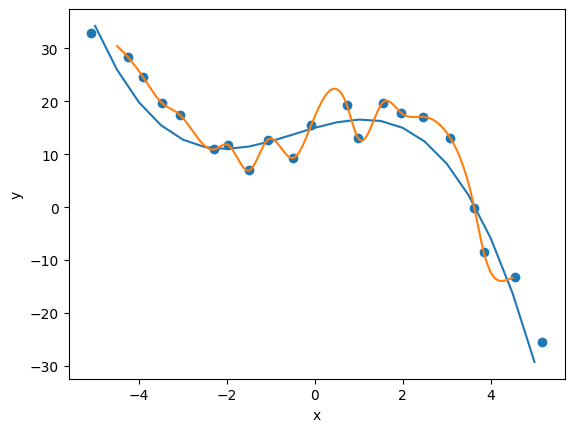

In [24]:
splineCubic = interpolate.interp1d(data[0], data[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineCubic(x_list))

## 2.3 Fit modelske funkcije

Tipično imamo v fiziki modele, ki opisujejo obnašanje sistema, katerega opazujemo. Cilj je izbira idealnih parametrov za modelsko funkcijo.

### 2.3.1 Definicija modelske funkcije

Za začetek obravnavamo polinomsko modelsko funkcijo oblike: 

$$ f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k $$

In [25]:
def polynomialModel(x, a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * x**k
    return t

In [26]:
a0 = np.array([15, 2.4, -0.5, -0.35])

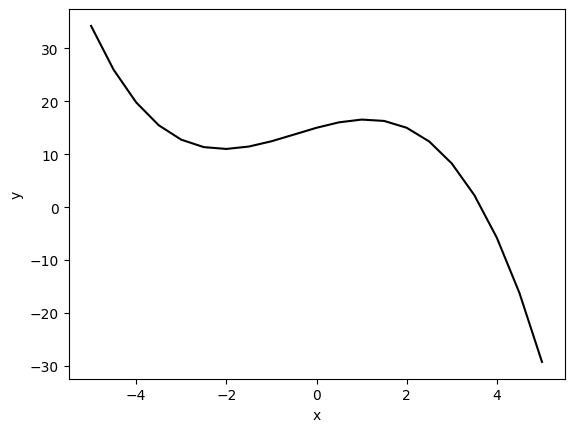

In [27]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a0),'black')

### 2.3.2 Napaka (error function)

Obstajajo številne definicije napak (error functions), katere bomo bolj podrobno spoznali pri analizi nevronskih mrež v kasnejših vajah.

Pogosta funkcija je SSE (sum of square errors):

$$ \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2, $$

kjer je $f$ modelska funkcija, določena s koeficienti $a_i$, $(x_i, y_i)$ pa so podatki, katere želimo modelirati.

In [28]:
def errorFit(f, coefficients, data):
    error = 0
    for i in range(len(data[0])):
        error = error + ( data[1,i] - f( data[0,i], coefficients ))**2
    return error

### 2.3.3 Minimizacija napake (gradient descent)

Za minimizacijo napake lahko uporabimo več metod. V teh vajah bomo uporabili t.i. "gradient descent" metodo. Koeficiente $a_i$ posodobimo glede na gradient napake $\nabla_{\vec{a}}\Delta$. Gradient sestavljajo elementi

$$ \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}, $$

iščemo pa njihovo ničlo, torej se od modelske točke pomikamo proti minimumu.

In [29]:
def errorFitGradient(f, coefficients, data):
    return -2 * np.array([
            np.sum(np.array([(data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k for i in range(len(data[0]))]))
        for k in range(len(coefficients))])

### 2.3.4 Zanka za fitanje modelske funkcije

In [30]:
iterations = 100000
h = 0.00001
a = 2*np.random.rand(4)-1

for i in range(iterations):
    a = a - h * errorFitGradient(polynomialModel, a, data)

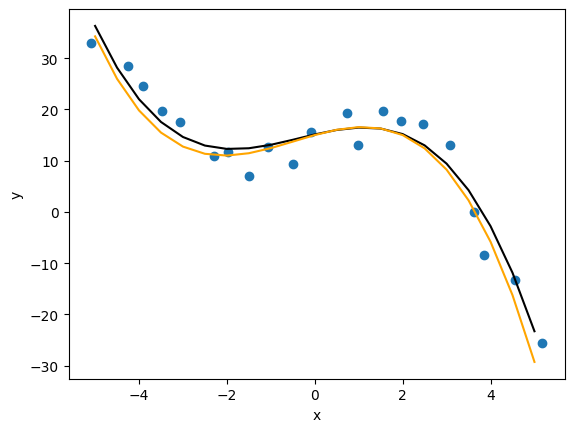

In [31]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, polynomialModel(x_list, a),'black')
plt.plot(x_list, polynomialModel(x_list, a0),'orange')
plt.scatter(data[0], data[1])

In [32]:
print(errorFit(polynomialModel, a, data))
print(errorFit(polynomialModel, a0, data))

270.6486128388208
376.1241264599088


Primerjava med a in a0

In [33]:
print(a)
print(a0)

[15.12337668  1.99623237 -0.34450372 -0.31806199]
[15.    2.4  -0.5  -0.35]
